## Import Libraries

In [1]:
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import os
from matplotlib.patches import Patch
import geopandas as gpd
from pykml import parser
import json


## My toolsbox

In [2]:
from src import tools
%load_ext autoreload
%autoreload 2

## Set paths

In [3]:
pth = 'C:\\Users\\akaaw\\airsea\\data\\jedi\\hfradar\\'
gpsfile = pth + 'meanposition_hfradar.txt'
#savepth = savepth.replace('/', '\\') #windows machine

## Load the HFradar data

In [4]:
# Read the text file
with open(gpsfile, 'r') as file:
    lines = file.readlines()

# Initialize empty lists to store latitude and longitude values
latitude = []
longitude = []

# Process the lines starting from the 11th line (ignoring the header lines and lines starting with '%')
for line in lines[10:]:
    line = line.strip()  # Remove leading/trailing whitespaces
    if line and not line.startswith('%'):  # Ignore empty lines and lines starting with '%'
        lat, lon = line.split()  # Split the line into latitude and longitude values
        latitude.append(float(lat))
        longitude.append(float(lon))
        

## Visualize

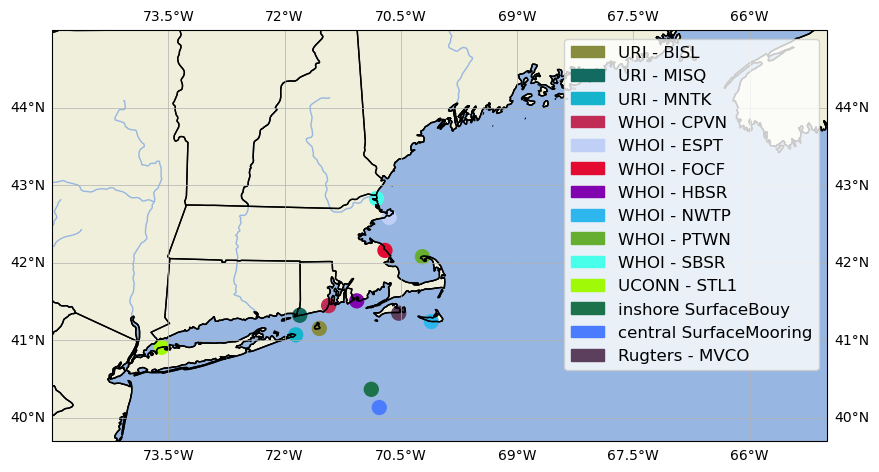

In [8]:


# Create a new figure and axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the map (adjust the values according to your desired domain)
ax.set_extent([-75, -65, 39.7, 45], crs=ccrs.PlateCarree())

# Generate random colors for each point
num_points = len(longitude)
colors = np.random.rand(num_points, 3)  # RGB values between 0 and 1

# Plot the latitude and longitude points on the map
scatter = ax.scatter(longitude, latitude, marker='o', s=100, c=colors, transform=ccrs.PlateCarree())

# Add map features like coastline, land, ocean, rivers, and vegetation
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5)

# Define custom legend handles
legend_handles = [
    Patch(color=scatter.get_facecolor()[0], label='URI - BISL'),
    Patch(color=scatter.get_facecolor()[1], label='URI - MISQ'),
    Patch(color=scatter.get_facecolor()[2], label='URI - MNTK'),
    Patch(color=scatter.get_facecolor()[3], label='WHOI - CPVN'),
    Patch(color=scatter.get_facecolor()[4], label='WHOI - ESPT'),
    Patch(color=scatter.get_facecolor()[5], label='WHOI - FOCF'),
    Patch(color=scatter.get_facecolor()[6], label='WHOI - HBSR'),
    Patch(color=scatter.get_facecolor()[7], label='WHOI - NWTP'),
    Patch(color=scatter.get_facecolor()[8], label='WHOI - PTWN'),
    Patch(color=scatter.get_facecolor()[9], label='WHOI - SBSR'),
    Patch(color=scatter.get_facecolor()[10], label='UCONN - STL1'),
    Patch(color=scatter.get_facecolor()[11], label='inshore SurfaceBouy'),
    Patch(color=scatter.get_facecolor()[12], label='central SurfaceMooring'),
    Patch(color=scatter.get_facecolor()[13], label='Rugters - MVCO')


]

# Add the legend with increased font size
ax.legend(handles=legend_handles, fontsize='large')

# Set the plot title
#ax.set_title("Mean Latitude and Longitude on East Coast of USA")
#fig.savefig('.\\figs\\hfradar.pdf')
plt.show()
